# Amazon 

##  Sale Performance Prediction

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

**Business problem:**

The objective of this study is to develop a machine-learning model that can do sale forecasting with high accuracy and high reliability for Amazon. To do that, a dataset consisting of 2,000 historical sales records across 20 features was utilized to train and evaluate various predictive models.

**Methodology:**

*Data Preprocessing:*

The data cleansing process tackled the problem of missing data and also recorded categorical variables to numerals to make them amenable to modeling.

*Model development:*

A total of 14 models were developed including the linear regression model and many multi-layer perceptrons (MPL) with various layers. The MPL architectures varied in depth, between three to seven layers, and were trained with different optimizers (Adam, Nadam, and RMSprop) with varying densities of neurons, learning rates, and degrees of non-linearities. The models were trained on 70% of the dataset and validated with the remaining 30%. Then, the models' performance was measured using MAE, RMSE, MSE, R-squared (R²), and correlation to choose the model that had the highest performance.


**Analysis and Findings**:

After assessing the test set, the best-performing ANN model had three layers and utilized the Adam optimizer. This model, having 128 neurons in the first layer, 64 in the second, and 1 in the output layer, gave the most accurate results with a learning rate of 0.001. This model slightly outperformed the linear regression baseline (R-squared = 0.9966), giving a small marginal improvement in predictive accuracy. In contrast, deeper ANNs model with more layers (6-7 layers) did not perform better results than the simpler ones. The most complicated models showed signs of overfitting and poor generalization with this dataset - like a 6-layer model using RMSprop optimizer, it had the lowest R-squared and the highest RMSE of 2,157.58.







<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Carry out necessary data preprocessing and exploration.*

In [ ]:
!pip install numpy==1.26.0
!pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 100.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [ ]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


df_sale = pd.read_csv('Part1_sales_performance_data.csv')
df_sale.head()

,Store Size (sq ft),Number of Employees,Advertising Spend ($),Product Variety,Seasonality Index,Customer Foot Traffic,Price Index,Competitor Pricing,Customer Satisfaction Score,Promotional Frequency,Online Sales (%),Product Return Rate (%),Supply Chain Efficiency Index,Economic Index,Market Share (%),Customer Demographics (Age Group),Store Location Type,Weather Impact Index,Store Opening Hours,Advertising Medium Mix (%),Sales ($)
0,8270,34,63912,233,3,13878,152,136,7.177197,7,40,21.072239,84,61.440579,24.385816,25-34,Rural,1.772686,77,30,31239.32047
1,1860,102,61272,1064,4,16120,234,243,7.202245,5,11,17.762790,79,99.898315,6.038915,25-34,Rural,10.739561,75,30,34985.56131
2,6390,26,43051,1148,2,2986,232,233,6.535659,5,40,6.296197,76,71.554261,4.180262,45-54,Urban,6.550752,77,35,31166.97326
3,6191,47,79854,1313,1,11825,123,122,6.003944,3,56,11.843460,95,96.584300,15.962231,45-54,Urban,12.167926,97,40,31759.42749
4,6734,70,83736,1264,2,10193,127,122,8.559455,9,52,24.786324,85,71.539903,17.202212,18-24,Urban,10.108129,84,45,31880.39810


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
print('Number of records read: ', df_sale.size) # size will return the number of elements within the data set
print('Number of records read: ', df_sale.shape) # in order to return the number of records number of rows, 81 = number of features/columns)
print('Number of records read: ', df_sale.shape [0])

Number of records read:  42000
Number of records read:  (2000, 21)
Number of records read:  2000


In [ ]:
df_sale.dtypes

,0
Store Size (sq ft),int64
Number of Employees,int64
Advertising Spend ($),int64
Product Variety,int64
Seasonality Index,int64
Customer Foot Traffic,int64
Price Index,int64
Competitor Pricing,int64
Customer Satisfaction Score,float64
Promotional Frequency,int64


In [ ]:
missing = df_sale.isnull().sum()
missing = missing > 0
missing.sort_values(ascending=False)

,0
Store Size (sq ft),False
Product Return Rate (%),False
Advertising Medium Mix (%),False
Store Opening Hours,False
Weather Impact Index,False
Store Location Type,False
Customer Demographics (Age Group),False
Market Share (%),False
Economic Index,False
Supply Chain Efficiency Index,False


In [ ]:
df_sale.describe(include='all')


,Store Size (sq ft),Number of Employees,Advertising Spend ($),Product Variety,Seasonality Index,Customer Foot Traffic,Price Index,Competitor Pricing,Customer Satisfaction Score,Promotional Frequency,Online Sales (%),Product Return Rate (%),Supply Chain Efficiency Index,Economic Index,Market Share (%),Customer Demographics (Age Group),Store Location Type,Weather Impact Index,Store Opening Hours,Advertising Medium Mix (%),Sales ($)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35-44,Urban,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520,961,NaN,NaN,NaN,NaN
mean,5562.773000,69.259000,50755.582500,807.890500,2.92500,10584.394500,172.32100,171.505000,7.501991,5.500000,35.516000,14.958329,79.260000,75.074344,15.727312,NaN,NaN,12.691474,79.930000,49.562000,30385.426733
std,2583.696539,28.716219,28972.976803,404.661208,1.41682,5542.201719,42.78873,44.040002,0.855592,2.875436,14.691176,5.794366,11.441803,14.451908,8.437693,NaN,NaN,7.171267,11.947069,11.665256,3504.377831
min,1001.000000,20.000000,1136.000000,100.000000,1.00000,1011.000000,100.00000,82.000000,6.000356,1.000000,10.000000,5.000186,60.000000,50.048248,1.005841,NaN,NaN,0.028809,60.000000,30.000000,21509.646240
25%,3358.250000,44.000000,26052.500000,461.750000,2.00000,5756.750000,135.75000,134.000000,6.760902,3.000000,23.000000,9.893783,69.000000,62.645669,8.480785,NaN,NaN,6.640101,69.000000,39.000000,27788.927205
50%,5643.000000,69.000000,50054.000000,796.500000,3.00000,10617.000000,171.00000,171.000000,7.522520,6.000000,36.000000,15.001392,79.000000,74.656048,15.796187,NaN,NaN,12.765055,80.000000,50.000000,30449.020020
75%,7854.750000,94.000000,76892.000000,1174.000000,4.00000,15488.000000,209.00000,208.000000,8.227827,8.000000,48.000000,19.903119,89.000000,87.869689,23.152919,NaN,NaN,18.927314,90.000000,60.000000,32898.889783


In [ ]:
# use get_dummies to change categorical data to numerical data
df_sale_num = df_sale.select_dtypes(include=['number'])
df_sale_customer_age = pd.get_dummies(df_sale['Customer Demographics (Age Group)'], prefix = 'Customer Age', dtype = int)
df_sale_store_location = pd.get_dummies(df_sale['Store Location Type'], prefix = 'Store Location', dtype = int)


df_sale_data = pd.concat([df_sale_num, df_sale_customer_age, df_sale_store_location], axis=1, join = 'inner')
label_col = 'Sales ($)'
df_sale_data.head()

# label column: the target variable or the outcome you want to predict in prediction analysis (also called supervised learning).

,Store Size (sq ft),Number of Employees,Advertising Spend ($),Product Variety,Seasonality Index,Customer Foot Traffic,Price Index,Competitor Pricing,Customer Satisfaction Score,Promotional Frequency,Online Sales (%),Product Return Rate (%),Supply Chain Efficiency Index,Economic Index,Market Share (%),Weather Impact Index,Store Opening Hours,Advertising Medium Mix (%),Sales ($),Customer Age_18-24,Customer Age_25-34,Customer Age_35-44,Customer Age_45-54,Store Location_Rural,Store Location_Suburban,Store Location_Urban
0,8270,34,63912,233,3,13878,152,136,7.177197,7,40,21.072239,84,61.440579,24.385816,1.772686,77,30,31239.32047,0,1,0,0,1,0,0
1,1860,102,61272,1064,4,16120,234,243,7.202245,5,11,17.762790,79,99.898315,6.038915,10.739561,75,30,34985.56131,0,1,0,0,1,0,0
2,6390,26,43051,1148,2,2986,232,233,6.535659,5,40,6.296197,76,71.554261,4.180262,6.550752,77,35,31166.97326,0,0,0,1,0,0,1
3,6191,47,79854,1313,1,11825,123,122,6.003944,3,56,11.843460,95,96.584300,15.962231,12.167926,97,40,31759.42749,0,0,0,1,0,0,1
4,6734,70,83736,1264,2,10193,127,122,8.559455,9,52,24.786324,85,71.539903,17.202212,10.108129,84,45,31880.39810,1,0,0,0,0,0,1


In [ ]:
train_size, valid_size, test_size = (0.7, 0.3, 0.0) # 70% used for training, 30% for validation
# Output of train_test_split() is assigned to sale_train and sale_valid
sale_train, sale_valid = train_test_split(df_sale_data,
                                      test_size=valid_size,
                                      random_state=2020)

In [ ]:
# x_train = training input, y_train = training output
sale_y_train = sale_train[[label_col]] # label_col: sales price
sale_x_train = sale_train.drop(label_col, axis=1)
# x_valid = training input, y_valid = training output
sale_y_valid = sale_valid[[label_col]]
sale_x_valid = sale_valid.drop(label_col, axis=1)
# y = Sales
# x = all featues
print('Size of training set: ', len(sale_x_train))
print('Size of validation set: ', len(sale_x_valid))

Size of training set:  1400
Size of validation set:  600


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(sale_x_train) # trained or fitted by the x train data
sale_x_train = pd.DataFrame(scaler.transform(sale_x_train),
                            columns = sale_x_train.columns, index = sale_x_train.index)
sale_x_valid = pd.DataFrame(scaler.transform(sale_x_valid),
                            columns = sale_x_valid.columns, index = sale_x_valid.index)

print('X train min =', round(sale_x_train.min().min(),4), '; max =', round(sale_x_train.max().max(), 4))
print('X valid min =', round(sale_x_valid.min().min(),4), '; max =', round(sale_x_valid.max().max(), 4))

# validation data falls outside the range because the train model produce outliers

X train min = 0.0 ; max = 1.0
X valid min = -0.0008 ; max = 1.0011


In [ ]:
sale_x_valid.head()

,Store Size (sq ft),Number of Employees,Advertising Spend ($),Product Variety,Seasonality Index,Customer Foot Traffic,Price Index,Competitor Pricing,Customer Satisfaction Score,Promotional Frequency,Online Sales (%),Product Return Rate (%),Supply Chain Efficiency Index,Economic Index,Market Share (%),Weather Impact Index,Store Opening Hours,Advertising Medium Mix (%),Customer Age_18-24,Customer Age_25-34,Customer Age_35-44,Customer Age_45-54,Store Location_Rural,Store Location_Suburban,Store Location_Urban
1001,0.541634,0.919192,0.627176,0.927806,0.75,0.839671,0.483221,0.521505,0.205545,0.222222,0.52,0.561299,0.641026,0.900678,0.522586,0.058466,0.725,0.384615,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1701,0.812674,0.222222,0.874205,0.795568,0.50,0.463425,0.664430,0.725806,0.938538,0.444444,0.82,0.406695,0.564103,0.961302,0.176918,0.295931,0.000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.091384,0.565657,0.360070,0.042888,0.00,0.560519,0.671141,0.682796,0.443819,0.222222,0.18,0.579184,0.743590,0.913575,0.654226,0.976941,0.175,0.820513,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1286,0.810450,0.090909,0.863442,0.701930,0.50,0.814092,0.711409,0.586022,0.389217,0.111111,0.96,0.244816,0.461538,0.722029,0.090383,0.304648,0.150,0.179487,1.0,0.0,0.0,0.0,0.0,0.0,1.0
881,0.259589,0.535354,0.196186,0.825590,0.25,0.737672,0.181208,0.193548,0.062335,1.000000,0.00,0.539944,0.461538,0.265815,0.376050,0.078666,0.700,0.641026,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
sale_x_valid.head()

,Store Size (sq ft),Number of Employees,Advertising Spend ($),Product Variety,Seasonality Index,Customer Foot Traffic,Price Index,Competitor Pricing,Customer Satisfaction Score,Promotional Frequency,Online Sales (%),Product Return Rate (%),Supply Chain Efficiency Index,Economic Index,Market Share (%),Weather Impact Index,Store Opening Hours,Advertising Medium Mix (%),Customer Age_18-24,Customer Age_25-34,Customer Age_35-44,Customer Age_45-54,Store Location_Rural,Store Location_Suburban,Store Location_Urban
1001,0.541634,0.919192,0.627176,0.927806,0.75,0.839671,0.483221,0.521505,0.205545,0.222222,0.52,0.561299,0.641026,0.900678,0.522586,0.058466,0.725,0.384615,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1701,0.812674,0.222222,0.874205,0.795568,0.50,0.463425,0.664430,0.725806,0.938538,0.444444,0.82,0.406695,0.564103,0.961302,0.176918,0.295931,0.000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.091384,0.565657,0.360070,0.042888,0.00,0.560519,0.671141,0.682796,0.443819,0.222222,0.18,0.579184,0.743590,0.913575,0.654226,0.976941,0.175,0.820513,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1286,0.810450,0.090909,0.863442,0.701930,0.50,0.814092,0.711409,0.586022,0.389217,0.111111,0.96,0.244816,0.461538,0.722029,0.090383,0.304648,0.150,0.179487,1.0,0.0,0.0,0.0,0.0,0.0,1.0
881,0.259589,0.535354,0.196186,0.825590,0.25,0.737672,0.181208,0.193548,0.062335,1.000000,0.00,0.539944,0.461538,0.265815,0.376050,0.078666,0.700,0.641026,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<a id = "cell_model"></a>
## 3. AI Model Development

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets. You only need to show the code of one model with the best performance. However, you should do various experiments with different models and model architectures and keep records of their performance, which will be included in the experiment report section below.*

## Deep Learning with Sequential Model

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # Import BatchNormalization here
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam # Import RMSprop here
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import metrics # import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [ ]:
arr_x_train = np.array(sale_x_train)
arr_y_train = np.array(sale_y_train)
arr_x_valid = np.array(sale_x_valid)
arr_y_valid = np.array(sale_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (1400, 25)
Training samples:  1400
Validation samples:  600


# Linear Regression Model

Linear Regression Performance:
MAE: 169.99803226666657
MSE: 39595.21216390454
RMSE: 198.98545716686067
R²: 0.9966199629095392
Correlation: 0.9983679195224473


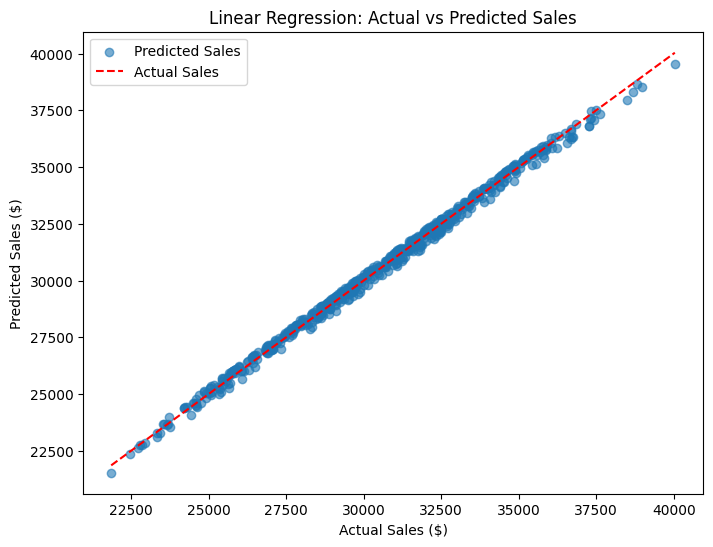

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(sale_x_train, sale_y_train)

# Predict on the validation set
sale_y_pred = linear_model.predict(sale_x_valid)



# Evaluate Linear Regression Performance
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(sale_y_valid, sale_y_pred))
print("MSE:", mean_squared_error(sale_y_valid, sale_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(sale_y_valid, sale_y_pred)))  # Calculate RMSE
print("R²:", r2_score(sale_y_valid, sale_y_pred))
print("Correlation:", np.corrcoef(sale_y_valid.values.ravel(), sale_y_pred.ravel())[0, 1])

# Calculate Correlation



# Visualize Actual vs Predicted Sales with Labels
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(sale_y_valid, sale_y_pred, alpha=0.6, label="Predicted Sales")

# Perfect prediction reference line
plt.plot([sale_y_valid.min().values[0], sale_y_valid.max().values[0]],
         [sale_y_valid.min().values[0], sale_y_valid.max().values[0]],
         color="red", linestyle="--", label="Actual Sales")

# Title and axis labels
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.xlabel("Actual Sales ($)")
plt.ylabel("Predicted Sales ($)")

# Add legend to identify components
plt.legend()

# Show the plot
plt.show()

# ANN model (Adam) - 2 layers

In [ ]:
# Define the ANN architecture
def build_ann_model(input_dim):
    model = Sequential()

    # Input Layer and First Hidden Layer
    model.add(Dense(128, activation="relu", input_shape=(input_dim,)))  # 128 neurons, ReLU activation

    # Second Hidden Layer
    model.add(Dense(64, activation="relu"))  # 64 neurons, ReLU activation

    # Output Layer
    model.add(Dense(1, activation="linear"))  # 1 neuron, Linear activation for regression

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

    return model

ann_model = build_ann_model(arr_x_train.shape[1])
ann_model.summary()  # Print the model architecture

# Train the ANN model

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
#Build the ANN model
history = ann_model.fit(
    arr_x_train, arr_y_train,
    validation_data=(arr_x_valid, arr_y_valid), # Use X_test_processed and y_test
    epochs=500,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
44/44 - 2s - 43ms/step - loss: 931784384.0000 - mae: 30319.7344 - val_loss: 941912640.0000 - val_mae: 30499.2832
Epoch 2/500
44/44 - 0s - 10ms/step - loss: 927960384.0000 - mae: 30256.9609 - val_loss: 933831872.0000 - val_mae: 30367.3008
Epoch 3/500
44/44 - 0s - 5ms/step - loss: 912161216.0000 - mae: 29996.1992 - val_loss: 907588352.0000 - val_mae: 29934.6191
Epoch 4/500
44/44 - 0s - 7ms/step - loss: 872324608.0000 - mae: 29326.4941 - val_loss: 851082624.0000 - val_mae: 28980.9199
Epoch 5/500
44/44 - 0s - 7ms/step - loss: 797909312.0000 - mae: 28036.0078 - val_loss: 756672896.0000 - val_mae: 27312.7539
Epoch 6/500
44/44 - 0s - 4ms/step - loss: 685056064.0000 - mae: 25954.6172 - val_loss: 624611840.0000 - val_mae: 24790.2461
Epoch 7/500
44/44 - 0s - 5ms/step - loss: 539848640.0000 - mae: 22998.8965 - val_loss: 467307840.0000 - val_mae: 21397.6348
Epoch 8/500
44/44 - 0s - 5ms/step - loss: 380293088.0000 - mae: 19218.5254 - val_loss: 307746208.0000 - val_mae: 17281.7480
Epoch 

In [ ]:
# Evaluate the ANN model - 2 layers
train_score = ann_model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = ann_model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss (MSE): ', round(train_score[0], 2))
print('Validation MAE: ', round(valid_score[1], 2), ', Validation Loss (MSE): ', round(valid_score[0], 2))

Train MAE:  166.27 , Train Loss (MSE):  39899.02
Validation MAE:  164.28 , Validation Loss (MSE):  39182.21


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model 1 Evaluation Metrics:
MAE: 164.28
MSE: 39182.24
RMSE: 197.95
R-squared: 0.997
Correlation: 0.998


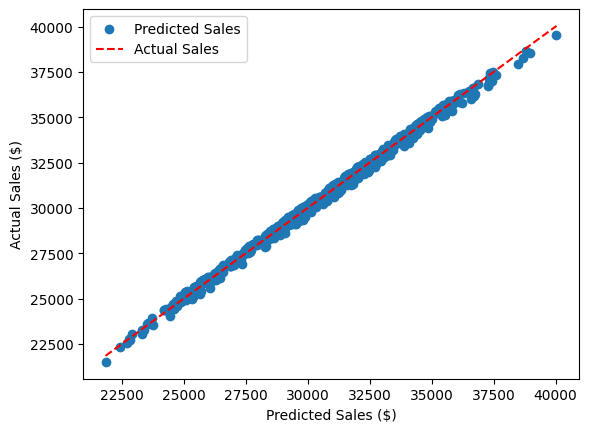

In [ ]:
y_valid_predict_1 = ann_model.predict(arr_x_valid)

mae_1 = mean_absolute_error(arr_y_valid, y_valid_predict_1)
mse_1 = mean_squared_error(arr_y_valid, y_valid_predict_1)
rmse_1 = np.sqrt(mean_squared_error(arr_y_valid, y_valid_predict_1))
r2_1 = r2_score(arr_y_valid, y_valid_predict_1)
corr_1 = np.corrcoef(arr_y_valid.reshape(1, -1)[0], y_valid_predict_1.reshape(1, -1)[0])[0, 1]

print(f"Model 1 Evaluation Metrics:")
print(f"MAE: {mae_1:.2f}")
print(f"MSE: {mse_1:.2f}")
print(f"RMSE: {rmse_1:.2f}")
print(f"R-squared: {r2_1:.3f}")
print(f"Correlation: {corr_1:.3f}")

plt.scatter(arr_y_valid, y_valid_predict_1, label="Predicted Sales" )
plt.plot([arr_y_valid.min(), arr_y_valid.max()], [arr_y_valid.min(), arr_y_valid.max()], color="red", linestyle="--", label="Actual Sales")
plt.ylabel('Actual Sales ($)')
plt.xlabel('Predicted Sales ($)')
plt.legend()
plt.show()

<a id = "cell_report"></a>
## 4. Experiments Report

*Provide a summary of results based on your experiments. Use table or figure to summarize the performance of various models. Identify the model with the best performance. Critically evaluate your developed solution, explain how your model can be used to address the related business problem and what should be considered when deploying your model for real world applications.*

**A summary:**
To determine the model has the best performance for predicting total sales, we trained and evaluated 14 models with different configurations, from simple linear regression to more complex Multilayer Perceptron models with multiple hidden layers. We evaluated each model using standard regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²), and correlation. (Table below)


**The model with the best performance:**

The experimental results indicate that the ANN model comprises three layers (two hidden layers) with 128 and 64 nodes, followed by an output layer and optimized using the Adam algorithm which had the most superior performance across all evaluated metrics. This model has the lowest MAE (164.28), MSE (39182.24), and RMSE (197.95), alongside the highest coefficient of determination (R-squared = 0.9967) and the highest correlation (0.998). The output layer did apply with a linear activation function (activation="linear") which was particularly suitable when we do sales forecasting and help the model generate continuous numerical predictions without transformation.

**The reason why the ANN model 2 layers have the best performance:**

The best-performing model is the ANN with two hidden layers. Because it contains the right degree of complication and generalization, the model is better performing. This model was complex enough to capture important non-linear patterns in the dataset, unlike the simpler linear regression model. Furthermore, this model is not deep or complicated with many layers to overfit like the other deeper neural networks that I had tested. Additionally, because of the usage of the Adam optimizer, learning rates were efficiently adjusted during training aiding in better convergence and improving prediction accuracy on the test data. Furthermore, the linear activation function is ideal for sale prediction where a continuous numeric output is required. Therefore, it is useful for this model.


**The suitability of my developed solution for deployment in real-world applications:**

This three-layer ANN model optimized with the Adam algorithm was the most effective in predicting total sales. It can be a great choice because it provides the best blend of generalization and complexity. Its strong performance highlights its capacity to capture subtle, non-linear trends in the sales data that simpler models like linear regression failed to do and deeper networks tended to overfit. RetailPro can use this model to do sale forecasting with high accuracy, The model, however, requires careful consideration when deploying. As we know, implementing and maintaining the ANN model requires a significant infrastructure budget. Particularly, the model needs to run on GPUs or in specialized hardware for their processing. In addition, sustained accuracy requires constant maintenance due to the unpredictability of the business market, which means that the model has to be regularly retrained with new data. Also, even though the model works pretty well, its "black box" nature might challenge our decisions. Therefore, we need to invest in clear communication of how the model works and how predictions are generated which might be a key to gaining user confidence and making sure of successful adaption when we use it across the company. In conclusion, while the three-layer ANN model gives a strong performance, deploying it will need careful management of costs, a volume of data sales - and clear communication to ensure user adoption and confidence.

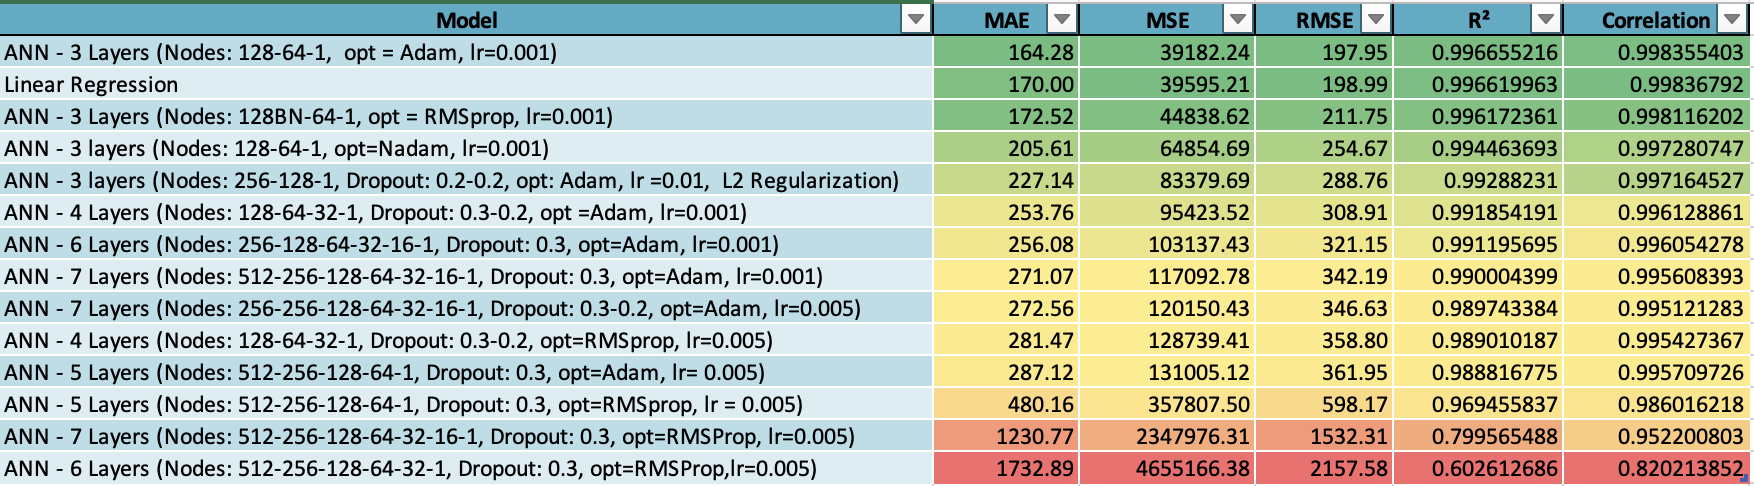

In [3]:
from IPython.display import Image, display
display(Image(filename='results_task1.PNG', width=1000))

## Training history for the ANN model 2 layers (Adam)

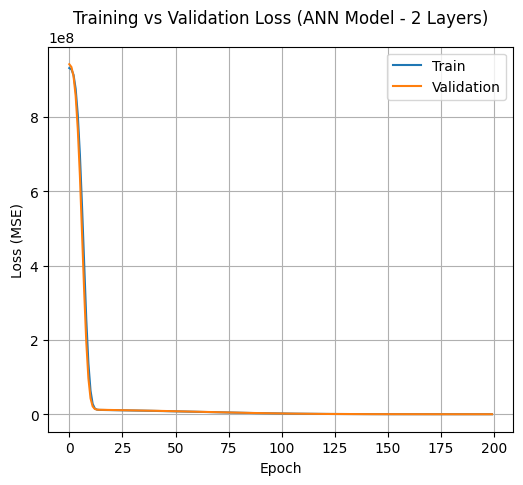

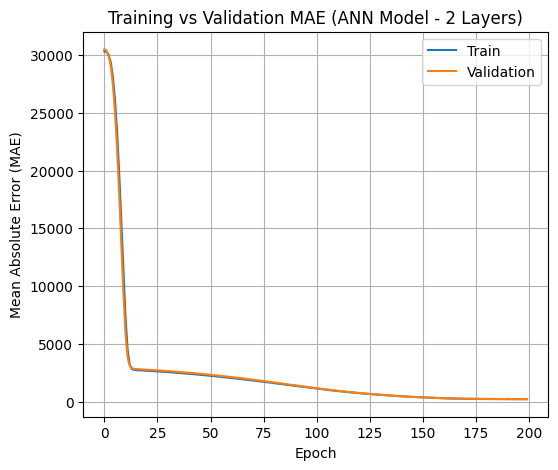

In [ ]:
def plot_training_history(history, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss (ANN Model - 2 Layers)')
    plt.ylabel('Loss (MSE)')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True)
    plt.show()

    # Plot training and validation MAE
    if 'mae' in history.history and 'val_mae' in history.history:
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Training vs Validation MAE (ANN Model - 2 Layers)')
        plt.ylabel('Mean Absolute Error (MAE)')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
        plt.grid(True)
        plt.show()

# Call the function with the history object of the ANN model
plot_training_history(history)

# Reference

Hill, T., Marquez, L., O’Connor, M., & Remus, W. (1994). Artificial neural network models for forecasting and decision making. International Journal of Forecasting, 10(1), 5–15. https://doi.org/10.1016/0169-2070(94)90045-0

Götze, T., Gürtler, M., & Witowski, E. (2023). Forecasting accuracy of machine learning and linear regression: evidence from the secondary CAT bond market. Journal of Business Economics, 93(9), 1629–1660. https://doi.org/10.1007/s11573-023-01138-8